Here, We have imported important library to download the libraries by which we can directly access the dataset's link

In [ ]:
import pandas as pd
import gdown

# File ID from the Google Drive link
file_id = '16ROEpY5wbFfKwKWNlt9q4bS1YdXM9xXF'
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the file and save it locally
gdown.download(download_url, 'dataset.csv', quiet=False)


try:
    df = pd.read_csv('dataset.csv')
except pd.errors.ParserError:
    print("Trying with a different delimiter or encoding...")
    df = pd.read_csv('dataset.csv', delimiter=',', encoding='utf-8', error_bad_lines=False)

Downloading...
From: https://drive.google.com/uc?id=16ROEpY5wbFfKwKWNlt9q4bS1YdXM9xXF
To: /content/dataset.csv
100%|██████████| 799k/799k [00:00<00:00, 45.1MB/s]


In [ ]:
!pip install wordcloud nltk

Explanation:

Import necessary libraries:

    -> pandas for data manipulation.
    -> Counter from collections for counting word frequencies.
    -> matplotlib.pyplot for plotting.
    -> WordCloud for generating word clouds.
    -> nltk and its stopwords corpus for text cleaning.
    -> re for regular expressions to clean text.

In [ ]:

import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import math
from collections import Counter
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Explanation:

Load the Taylor Swift lyrics dataset from a CSV file into a pandas DataFrame. Display information about the DataFrame's structure and show the first few rows for inspection.

Explanation:

Extract and display the names of columns in the DataFrame to understand the data fields available.

In [ ]:
column_names = df.columns.tolist()
print("Column Names:", column_names)

Column Names: ['Unnamed: 0', 'Artist', 'Title', 'Album', 'Year', 'Date', 'Lyric']


Explanation:

Combine all non-null lyrics into a single string. This aggregation is necessary to perform text analysis on the entire corpus of lyrics.

In [ ]:
# Combine all non-empty Lyric into one string
all_text = ' '.join(df['Lyric'].dropna().astype(str).tolist())

Explanation:

Clean the aggregated text by:

Removing non-alphabet characters.

Converting text to lowercase.

Tokenizing into words.

Removing stopwords.

Counting the frequency of each word using Counter.

In [ ]:
# Clean the text
clean_text = re.sub(r'[^a-zA-Z\s]', '', all_text.lower())

# Tokenize
tokens = clean_text.split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in tokens if word not in stop_words]

# length of filtered_words
word_counts = Counter(filtered_words)

Explanation:

Perform Zipf's Law analysis by sorting word frequencies, ranking them, and plotting rank vs. frequency on a log-log scale to see if word distribution follows Zipf's distribution.

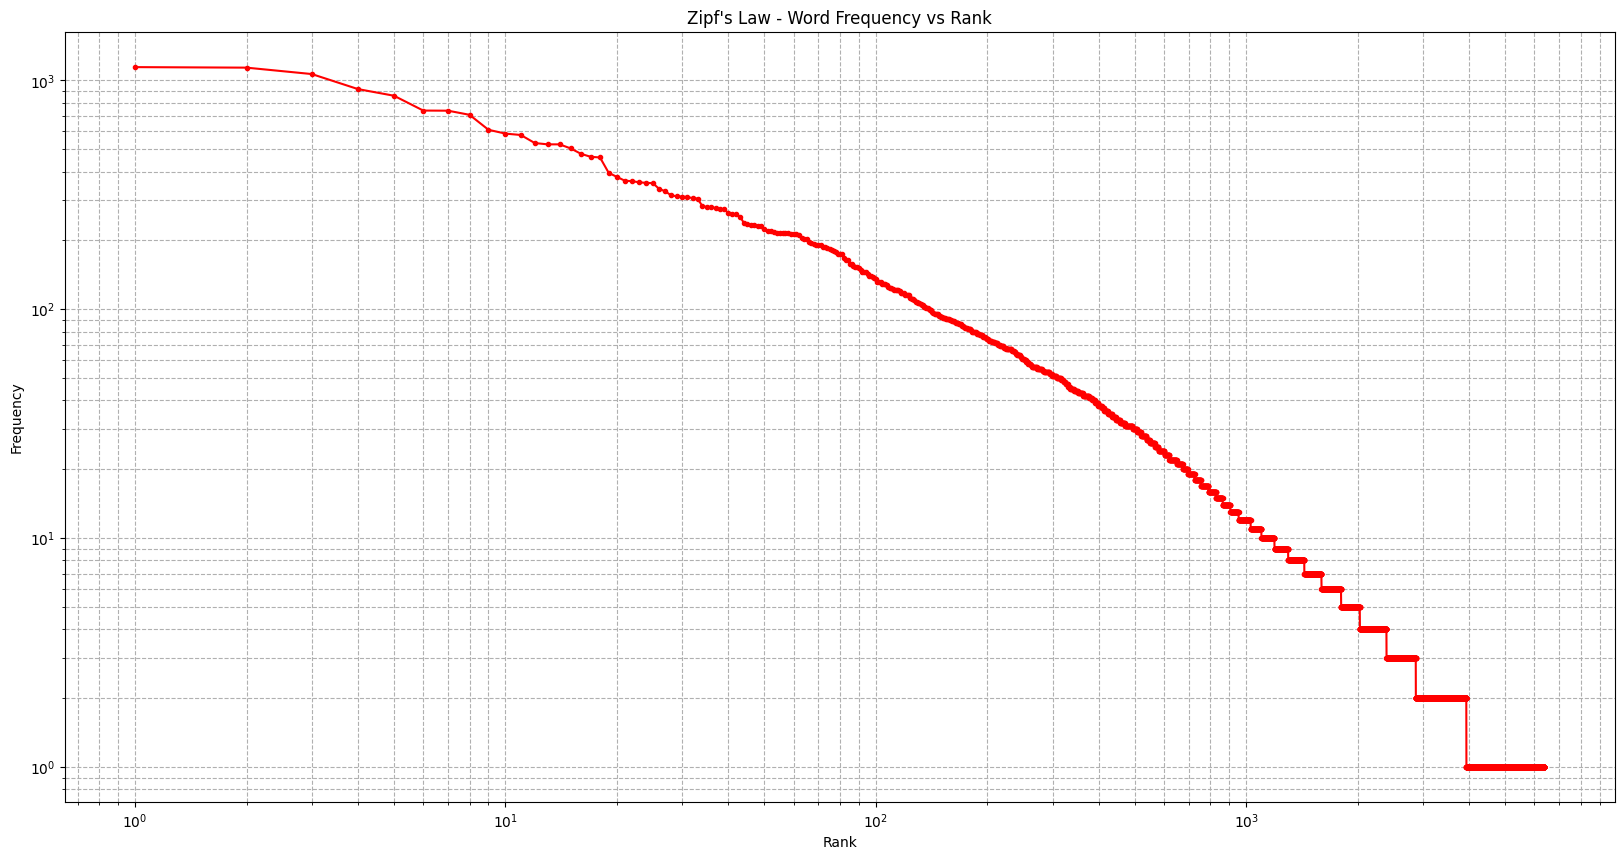

In [ ]:
# Zipf's Law Analysis
frequencies = sorted(word_counts.values(), reverse=True)
ranks = list(range(1, len(frequencies) + 1))

plt.figure(figsize=(20, 10))
plt.loglog(ranks, frequencies, marker='.', color='red')
plt.title("Zipf's Law - Word Frequency vs Rank")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True, which="both", linestyle='--')
plt.show()

Explanation:

Count the number of songs released each year by grouping the DataFrame by year and plotting the counts to see the distribution of song releases over time.

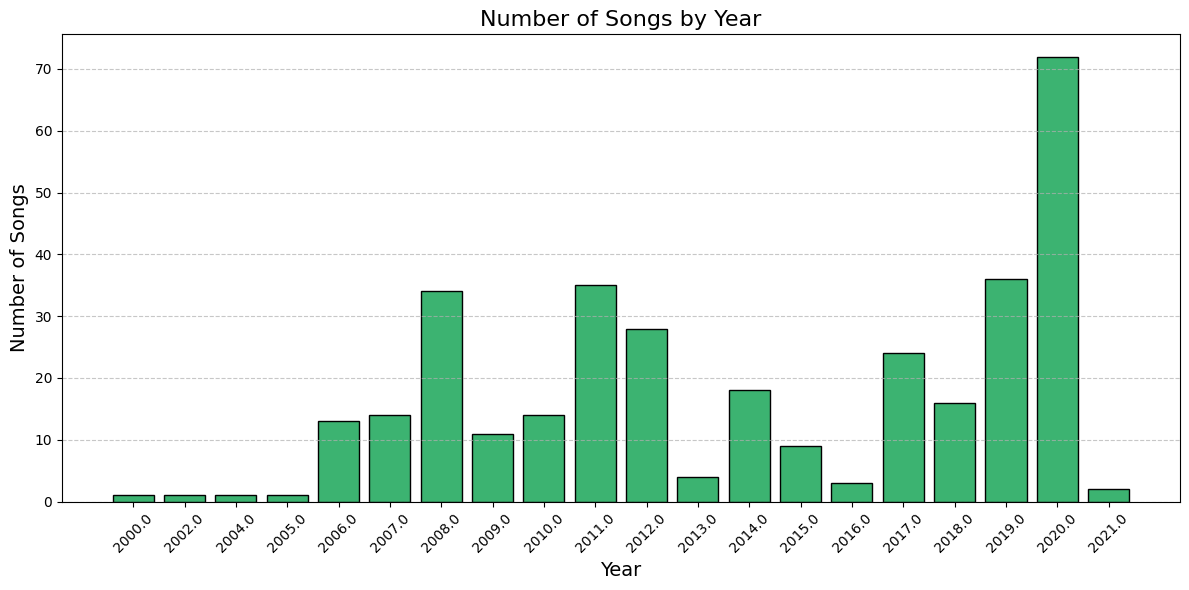

In [ ]:
# Count and sort the number of songs per year
year_counts = df['Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(year_counts.index.astype(str), year_counts.values, color='mediumseagreen', edgecolor='black')

# Enhancing the plot
plt.title("Number of Songs by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Songs", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Explanation:

Number of song per year wise by taylor swift

Explanation:

Generate a word cloud from all lyrics to visually highlight the most prominent words in an intuitive graphical format.

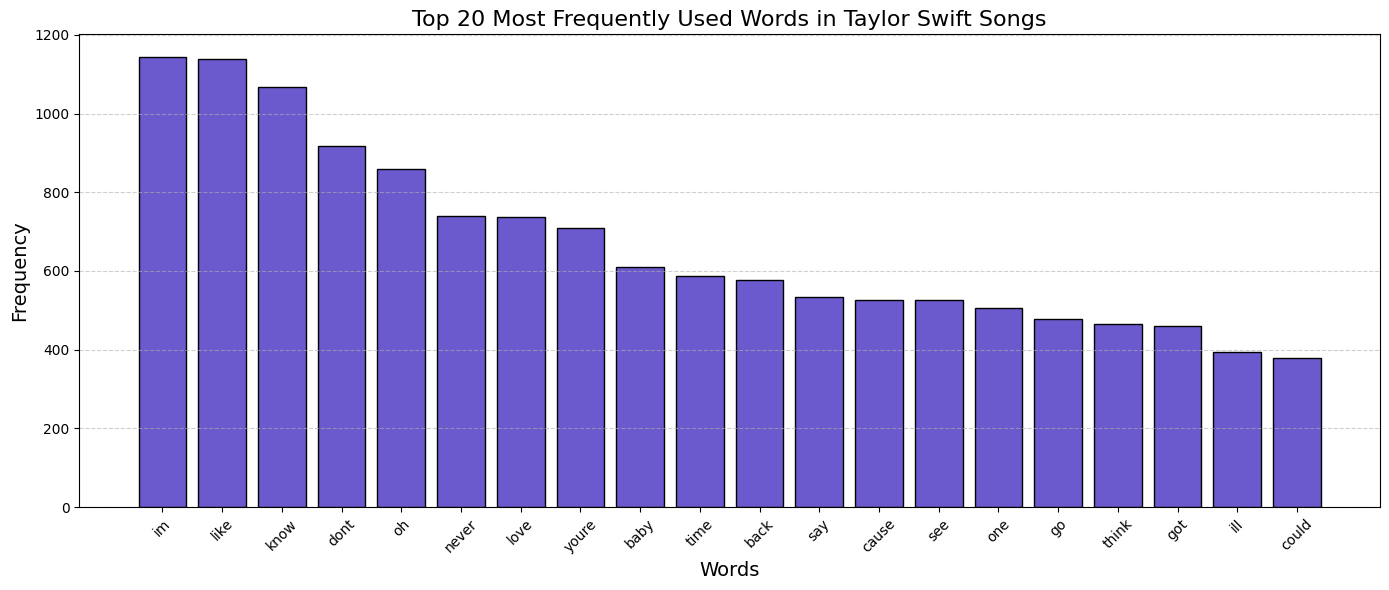

In [ ]:
# Combine all lyrics into one string
all_lyrics = df['Lyric'].dropna().str.cat(sep=" ").lower()
clean_text = re.sub(r'[^a-z\s]', '', all_lyrics)
words = clean_text.split()

filtered_words = [word for word in words if word not in stop_words]

word_counts = Counter(filtered_words)


top_words = word_counts.most_common(20)
words, counts = zip(*top_words)


plt.figure(figsize=(14, 6))
plt.bar(words, counts, color='slateblue', edgecolor='black')


plt.title("Top 20 Most Frequently Used Words in Taylor Swift Songs", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
